In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

c:\Users\dakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [7]:
driver = webdriver.Chrome()
driver.get('https://internshala.com/internships/engineering-internship/index=0/')

html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
# web = requests.get('https://internshala.com/internships/engineering-internship/index=0/').text
# soup = BeautifulSoup(web, 'lxml')
print(soup.prettify())

<html class="js-focus-visible" lang="en" style="--scrollbar-width:17px;" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="702141670710132" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" rel="preload" type=

In [8]:
company_name=[]
for i in soup.find_all('a', class_='link_display_like_text view_detail_button'):
    company_name.append(i.text.strip())

print(len(company_name))
company_name

43


['Skill-Lync',
 'Dendrite.ai',
 'Resshu Connect Private Limited',
 'Paisabazaar',
 'IIT Bombay',
 'IIT Bombay',
 'Actolap Solutions India Private Limited',
 'Royal Enfield',
 'Viacom India LLP',
 'IIT Bombay',
 'The Crafty Talk',
 'The Crafty Talk',
 'Resolute AI Software',
 'Endeavor Academy',
 'INGLU',
 'Endeavor Academy',
 'Avadesh B',
 'IESoft Technologies Private Limited',
 'SKIDS Health',
 'NMS Games Private Limited',
 'IESoft Technologies Private Limited',
 'Quantum IT',
 'Omninos Technologies International Private Limited',
 'NextEdge Labs',
 'Yapply LLC',
 'Omninos Technologies International Private Limited',
 'Quantum IT',
 'Quantum IT',
 'Retranz Infolabs',
 'EG Allied Private Limited',
 'Omninos Technologies International Private Limited',
 'IMG Global Infotech Private Limited',
 'Upride Network Private Limited',
 'Cerebry',
 'Cerebry',
 'AlmaBetter',
 'Mayankal',
 'Rocket Llama Games',
 'Colorsmart Enterprises',
 'Nexondeck',
 'Blackcoffer',
 'Elephants Media Private Limit

In [ ]:
# logo=[]
# for i in soup.find_all('img', class_='company_logo'):

In [9]:
job_title=[]
for i in soup.find_all('h3', class_='heading_4_5 profile'):
    job_title.append(i.text.strip())

# len(job_title)
job_title

l = []
location = []
for p in soup.find_all('p', id="location_names"):
    for i in p.find('a', class_="location_link view_detail_button"):
        l.append(i.text.strip())
    location.append(l)
    l = []
for div in soup.find_all('div', id="location_names"):
    for i in div.find('a', class_="location_link view_detail_button"):
        l.append(i.text.strip())
    location.append(l)
    l = []
print(len(job_title))
print(len(location))

43
43


In [21]:
import re

skills_reqd=[]
about_company=[]
job_responsibilities=[]
job_requirements=[]
l2=[]
l1=[]
for div in soup.find_all('div', class_="cta_container"):
    url = "https://internshala.com/"+div.find('a')['href']
    web2 = requests.get(url).text
    # print(url)
    #-------------------------------------------------------------------------------------
    soup2 = BeautifulSoup(web2, 'lxml')
    if(soup2.find('div', class_='section_heading heading_5_5 skills_heading')):
        for i in soup2.find_all('div', class_='round_tabs_container'):
                skills_reqd.append(i.text.strip().replace('\n', ', ').replace('\r', '')+" ")
                break
    else:
        skills_reqd.append(" ")
    for i in soup2.find_all('div', class_='text-container about_company_text_container'):
        about_company.append(i.text.strip())
    #-------------------------------------------------------------------------------------
    for div2 in soup2.find_all('div', class_='internship_details'):
            # count+=1
        for i in div2.select("div[class='text-container']"):
            txt = i.text.strip()
            # print(txt)
            if("Key responsibilities:" in txt):
                # print("yay")
                responsibilities = txt.split("Key responsibilities:")[1].split("Requirements:")[0].strip()
                
                #remove index numbers from responsibilities
                responsibilities = re.sub(r'\d+\.', '', responsibilities)
                responsibilities = responsibilities.replace("\n", ',')
                
                
                l1.append(responsibilities)
                # print(l1)
            # if "Key responsibilities:\n" in txt:
            #     print("yay")
                # print("----")

            if ("Requirements:" in txt):
                requirements = txt.split("Requirements:")[1].strip()
                requirements = re.sub(r'\d+\.', '', requirements)
                requirements = requirements.replace("\n", ',')
                
                l2.append(requirements)
                # print(l2)
        
        job_responsibilities.append(l1)
        job_requirements.append(l2)
        
        
    

        
# print(count)
print(len(skills_reqd))
print(len(about_company))
print(len(job_responsibilities))
print(len(job_requirements))
# print(skills_reqd)

43
43
43
43


In [22]:
df = pd.DataFrame({'Company Name':company_name, 'Job Title':job_title, 'About Company':about_company, 'Location':location, 'Skills Required':skills_reqd, 'Job responsibilities':job_responsibilities, 'Job requirements':job_requirements, 'Job responsibilities':job_responsibilities, 'Job responsibilities':job_responsibilities})

In [23]:
df.sample(5)

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
5,IIT Bombay,C++ Development (QT Creator),"The Indian Institute of Technology, Bombay (II...",[Work From Home],"C++ Programming, C Programming, Data Structures",[ Identifying new sales opportunities and hand...,[ Bachelor's degree or higher in mechanical en...
33,Cerebry,Content Coding (Python Development),Cerebry is an ed-tech company changing the edu...,[Work From Home],"Algorithms, Mathematics, Python",[ Identifying new sales opportunities and hand...,[ Bachelor's degree or higher in mechanical en...
29,EG Allied Private Limited,WordPress Development,Entire Globe Allied is in the IT services & BP...,[Work From Home],,[ Identifying new sales opportunities and hand...,[ Bachelor's degree or higher in mechanical en...
17,IESoft Technologies Private Limited,Full Stack Development,IESoft Technologies Private Limited is a produ...,[Work From Home],"CSS, HTML, JavaScript, Node.js, ReactJS",[ Identifying new sales opportunities and hand...,[ Bachelor's degree or higher in mechanical en...
16,Avadesh B,React Native Development And Testing,I am currently working on an early-stage start...,[Work From Home],"MEAN/MERN Stack, React Native",[ Identifying new sales opportunities and hand...,[ Bachelor's degree or higher in mechanical en...


In [24]:
df.isnull().sum()
# type(df)

Company Name            0
Job Title               0
About Company           0
Location                0
Skills Required         0
Job responsibilities    0
Job requirements        0
dtype: int64

In [25]:
df.shape

(43, 7)

In [26]:
df["Location"] = df["Location"].apply(lambda x: ' '.join(x))
df["Job responsibilities"] = df["Job responsibilities"].apply(lambda x: ' '.join(x))
df["Job requirements"] = df["Job requirements"].apply(lambda x: ' '.join(x))
df.sample(5)

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
5,IIT Bombay,C++ Development (QT Creator),"The Indian Institute of Technology, Bombay (II...",Work From Home,"C++ Programming, C Programming, Data Structures",Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
10,The Crafty Talk,Mechanical Engineering,We are an organization that aims to imbibe the...,Work From Home,"ANSYS, AutoCAD, Autodesk Fusion 360, Catia, MS...",Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
37,Rocket Llama Games,Unity Game Programming,Rocket Llama Games by Crafix Productions LLP i...,Work From Home,"C#, Unity 3D, Unity Engine",Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
13,Endeavor Academy,Mechanical Engineering - Subject Matter Expert...,Endeavor Academy is an academy of industry exp...,Work From Home,"AutoCAD, LaTeX",Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
17,IESoft Technologies Private Limited,Full Stack Development,IESoft Technologies Private Limited is a produ...,Work From Home,"CSS, HTML, JavaScript, Node.js, ReactJS",Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...


In [27]:

# df.duplicated().sum()

df['Skills Required'] = df['Skills Required'].str.replace(',', ' ')
# 
#df['Location'] = df['Location'].str.replace(' ', '')
#df['Job responsibilities'] = df['Job responsibilities'].str.replace(' ', ',')
# df['Job requirements'] = df['Job requirements'].str.replace(' ', ',')
df.head()

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,English Proficiency (Spoken) English Proficie...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
1,Dendrite.ai,React/NodeJS Web/UI Development,We are a fintech catered toward investment ban...,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
2,Resshu Connect Private Limited,React Native Intern,Resshu Connect Private Limited (Apna Konnect) ...,Work From Home,JavaScript React Native,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
3,Paisabazaar,Frontend Development,Paisabazaar is India's largest consumer credit...,Gurgaon,CSS HTML ReactJS,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...
4,IIT Bombay,Machine Learning,"The Indian Institute of Technology, Bombay (II...",Work From Home,Computer Vision Deep Learning Machine Learni...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...


In [28]:
#create tags column which will contain keywords from Location, Skills Required, Job responsibilities, Job requirements
# def add_comma(string):
#     return string + ","
x = df['Job Title'].str.replace(' ', '')

# df['Tags'] = x.apply(add_comma) + ', ' + df['Skills Required'] + ', ' + df['Job responsibilities']
df['Tags'] = df['Job Title'] + ', ' + df['Skills Required'] #+ ', ' + df['Job responsibilities']

In [29]:
df.head()

,Company Name,Job Title,About Company,Location,Skills Required,Job responsibilities,Job requirements,Tags
0,Skill-Lync,Inside Sales Specialist,Skill-Lync is an e-learning platform that prov...,Hyderabad,English Proficiency (Spoken) English Proficie...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...,"Inside Sales Specialist, English Proficiency (..."
1,Dendrite.ai,React/NodeJS Web/UI Development,We are a fintech catered toward investment ban...,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...,"React/NodeJS Web/UI Development, CSS Docker ..."
2,Resshu Connect Private Limited,React Native Intern,Resshu Connect Private Limited (Apna Konnect) ...,Work From Home,JavaScript React Native,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...,"React Native Intern, JavaScript React Native"
3,Paisabazaar,Frontend Development,Paisabazaar is India's largest consumer credit...,Gurgaon,CSS HTML ReactJS,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...,"Frontend Development, CSS HTML ReactJS"
4,IIT Bombay,Machine Learning,"The Indian Institute of Technology, Bombay (II...",Work From Home,Computer Vision Deep Learning Machine Learni...,Identifying new sales opportunities and handl...,Bachelor's degree or higher in mechanical eng...,"Machine Learning, Computer Vision Deep Learni..."


In [30]:
df["Tags"]

0     Inside Sales Specialist, English Proficiency (...
1     React/NodeJS Web/UI Development, CSS  Docker  ...
2        React Native Intern, JavaScript  React Native 
3             Frontend Development, CSS  HTML  ReactJS 
4     Machine Learning, Computer Vision  Deep Learni...
5     C++ Development (QT Creator), C++ Programming ...
6     Product Management, English Proficiency (Spoke...
7     Embedded Systems, Arduino  C Programming  Embe...
8     Web Development, Amazon Web Server (AWS)  Boot...
9     Web Development (Django), Bootstrap  Cloud Com...
10    Mechanical Engineering, ANSYS  AutoCAD  Autode...
11    Blockchain Development, Blockchain  C++ Progra...
12    Software Testing, Database Testing  GUI Testin...
13    Mechanical Engineering - Subject Matter Expert...
14                            Web Development/Design,  
15    Electrical Engineering - Subject Matter Expert...
16    React Native Development And Testing, MEAN/MER...
17    Full Stack Development, CSS  HTML  JavaScr

In [31]:
# df_new = df[["Company Name", "Job Title", "Location", "Tags"]]
# df_new.head()
#replace "/" with " "
df['Tags'] = df['Tags'].str.replace('/', ' ')
df_new=df.drop(['About Company', 'Job responsibilities', 'Job requirements'], axis=1)
df_new.head()

,Company Name,Job Title,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Hyderabad,English Proficiency (Spoken) English Proficie...,"Inside Sales Specialist, English Proficiency (..."
1,Dendrite.ai,React/NodeJS Web/UI Development,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,"React NodeJS Web UI Development, CSS Docker ..."
2,Resshu Connect Private Limited,React Native Intern,Work From Home,JavaScript React Native,"React Native Intern, JavaScript React Native"
3,Paisabazaar,Frontend Development,Gurgaon,CSS HTML ReactJS,"Frontend Development, CSS HTML ReactJS"
4,IIT Bombay,Machine Learning,Work From Home,Computer Vision Deep Learning Machine Learni...,"Machine Learning, Computer Vision Deep Learni..."


In [32]:
def remove_comma(string):
    return string.replace(',', ' ')

df_new["Tags"] = df_new["Tags"].apply(remove_comma)
df_new.head()

,Company Name,Job Title,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Hyderabad,English Proficiency (Spoken) English Proficie...,Inside Sales Specialist English Proficiency (...
1,Dendrite.ai,React/NodeJS Web/UI Development,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,React NodeJS Web UI Development CSS Docker ...
2,Resshu Connect Private Limited,React Native Intern,Work From Home,JavaScript React Native,React Native Intern JavaScript React Native
3,Paisabazaar,Frontend Development,Gurgaon,CSS HTML ReactJS,Frontend Development CSS HTML ReactJS
4,IIT Bombay,Machine Learning,Work From Home,Computer Vision Deep Learning Machine Learni...,Machine Learning Computer Vision Deep Learni...


In [33]:
import nltk
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

def stem(text):
    y=[]
    for i in text.split():
        y.append(i.lower())
    return ' '.join(y)

df_new['Tags'] = df_new['Tags'].apply(stem)
df_new.head()

,Company Name,Job Title,Location,Skills Required,Tags
0,Skill-Lync,Inside Sales Specialist,Hyderabad,English Proficiency (Spoken) English Proficie...,inside sales specialist english proficiency (s...
1,Dendrite.ai,React/NodeJS Web/UI Development,Work From Home,CSS Docker Git HTML JavaScript Node.js R...,react nodejs web ui development css docker git...
2,Resshu Connect Private Limited,React Native Intern,Work From Home,JavaScript React Native,react native intern javascript react native
3,Paisabazaar,Frontend Development,Gurgaon,CSS HTML ReactJS,frontend development css html reactjs
4,IIT Bombay,Machine Learning,Work From Home,Computer Vision Deep Learning Machine Learni...,machine learning computer vision deep learning...


In [34]:
import pickle

pickle.dump(df_new, open('df_new.pkl','wb'))

In [32]:
# skills=['seo cryptography nosql programming javascript testing js c english requests coding email website java api python system docker design github ai health html']

In [36]:
# !pip install ftfy
import re

from ftfy import fix_text

def ngrams(string, n=3):
    string = fix_text(string) # fix text
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower()
    chars_to_remove = [")","(",".","|","[","]","{","}","'"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string)
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single
    string = ' '+ string +' ' # pad names for ngrams...
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [57]:
skills = ['javascript reactjs typescript']
# skills
from sklearn.feature_extraction.text import TfidfVectorizer
# import re
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(skills)
tfidf

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(tfidf)
test = (df_new['Tags'].values.astype('U'))

In [52]:
def getNearestN(query):
  queryTFIDF_ = vectorizer.transform(query)
  distances, indices = nbrs.kneighbors(queryTFIDF_)
  return distances, indices

In [53]:
distances, indices = getNearestN(test)
test = list(test) 
matches = []

In [54]:
for i,j in enumerate(indices):
    dist=round(distances[i][0],2)
  
    temp = [dist]
    matches.append(temp)
    
matches = pd.DataFrame(matches, columns=['Match confidence'])

In [55]:
df_new['match']=matches['Match confidence']
df1=df_new.sort_values('match')
# df1[['Company Name','Job Title','Skills Required','Location']].head(5).reset_index()

In [56]:
ans=df1.sort_values(by='match', ascending=False).head(5)
print(ans.head(5))
# df1.head()

                      Company Name  \
32  Upride Network Private Limited   
15                Endeavor Academy   
37              Rocket Llama Games   
38          Colorsmart Enterprises   
39                       Nexondeck   

                                            Job Title        Location  \
32                            Android App Development  Work From Home   
15  Electrical Engineering - Subject Matter Expert...  Work From Home   
37                             Unity Game Programming  Work From Home   
38                                 Matlab Development  Work From Home   
39                     3D Character Animation (Unity)  Work From Home   

                                    Skills Required  \
32  Android  Firebase  Java  Kotlin  REST API  XML    
15                                                    
37                      C#  Unity 3D  Unity Engine    
38                                          MATLAB    
39     3ds Max  Blender 3D  Unity 3D  Unity Engine    

 

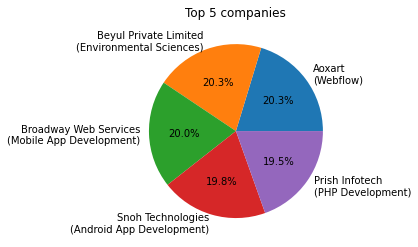

In [44]:
import matplotlib.pyplot as plt

names = ans['Company Name']+'\n('+ans['Job Title']+')'
index = ans['match']

plt.pie(index, labels=names, autopct = '%1.1f%%')
plt.title('Top 5 companies')
plt.show()